In [1]:
import polars as pl
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol'))).alias('return')
])

df = df.with_columns([
    ((pl.col('vwap') - pl.col('close')) / (pl.col('vwap') + pl.col('close'))).alias('alpha042')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,vwap,return,alpha042
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",0.433554,null,-0.019723
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.444267,1.018182,-0.016528
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",0.457642,0.991943,0.002346
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",0.436542,0.943359,0.007898
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",0.427501,0.967186,0.014115
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.149566,1.001339,-0.000114
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.149601,1.0,0.000004
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",0.149411,0.995989,0.001378


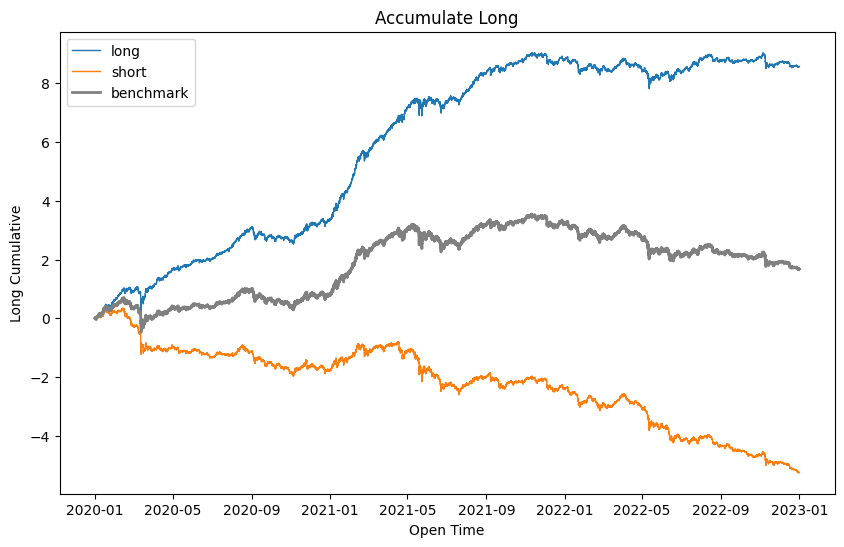

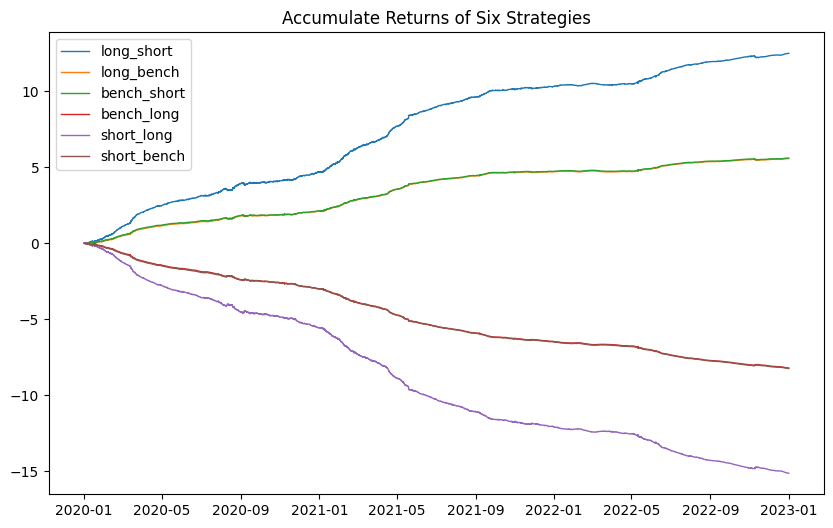

long: 
ann_return = 2.8519  sharpe = 2.5635  maxdd = 0.4019  calmar_ratio = 7.0963  

short: 
ann_return = -1.7478  sharpe = -1.6125  maxdd = 4.1644  calmar_ratio = -0.4197  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 4.1617  sharpe = 13.1847  maxdd = 0.0854  calmar_ratio = 48.7275  

long_bench: 
ann_return = 1.8564  sharpe = 11.7612  maxdd = 0.0485  calmar_ratio = 38.2682  

bench_long: 
ann_return = -2.7324  sharpe = -17.3111  maxdd = 8.1059  calmar_ratio = -0.3371  

short_long: 
ann_return = -5.0377  sharpe = -15.9599  maxdd = 14.7089  calmar_ratio = -0.3425  

short_bench: 
ann_return = -2.7433  sharpe = -17.2781  maxdd = 8.1204  calmar_ratio = -0.3378  

bench_short: 
ann_return = 1.8673  sharpe = 11.7609  maxdd = 0.0462  calmar_ratio = 40.44  



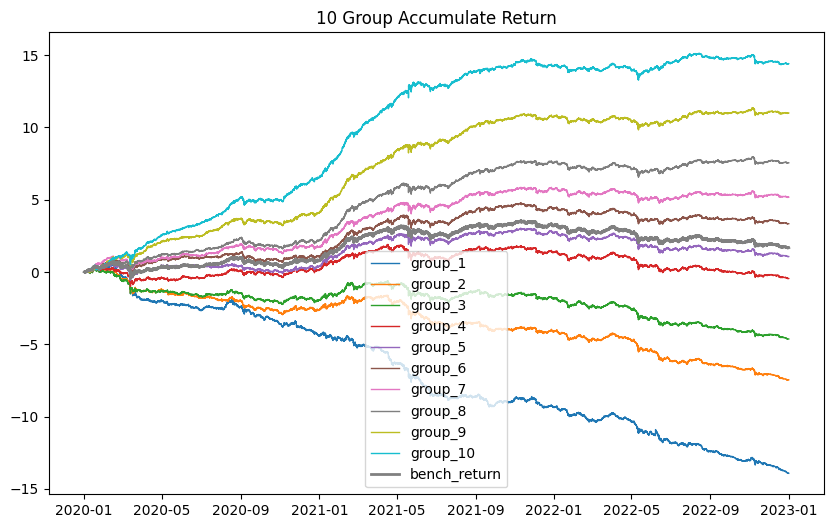

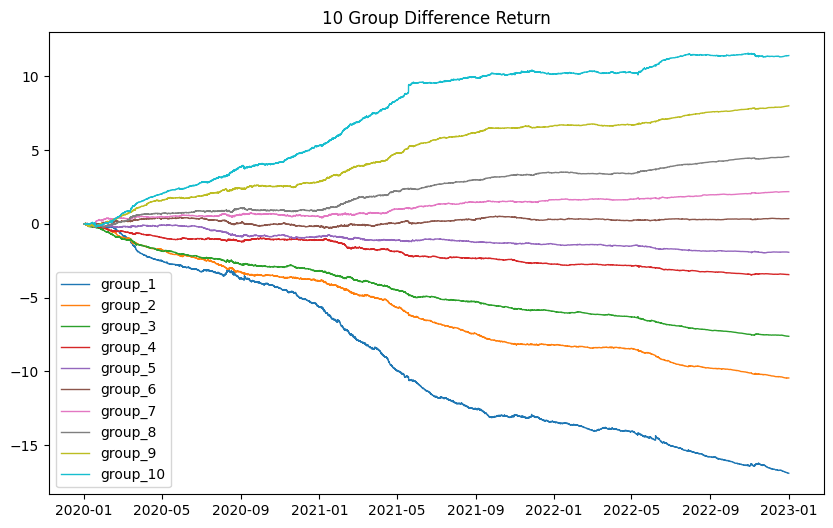

group_1: 
ann_return = -4.6375  sharpe = -3.6983  maxdd = 9.3635  calmar_ratio = -0.4953  

group_2: 
ann_return = -2.4852  sharpe = -2.1869  maxdd = 6.0608  calmar_ratio = -0.41  

group_3: 
ann_return = -1.5442  sharpe = -1.3984  maxdd = 3.9391  calmar_ratio = -0.392  

group_4: 
ann_return = -0.1502  sharpe = -0.1372  maxdd = 0.9892  calmar_ratio = -0.1519  

group_5: 
ann_return = 0.3541  sharpe = 0.3212  maxdd = 0.737  calmar_ratio = 0.4804  

group_6: 
ann_return = 1.113  sharpe = 1.009  maxdd = 0.581  calmar_ratio = 1.9156  

group_7: 
ann_return = 1.7234  sharpe = 1.5625  maxdd = 0.533  calmar_ratio = 3.2333  

group_8: 
ann_return = 2.5157  sharpe = 2.2441  maxdd = 0.4114  calmar_ratio = 6.1149  

group_9: 
ann_return = 3.6629  sharpe = 3.1697  maxdd = 0.3397  calmar_ratio = 10.784  

group_10: 
ann_return = 4.7973  sharpe = 3.7387  maxdd = 0.37  calmar_ratio = 12.9673  

-----------------------------------------
group_difference_1: 
ann_return = -5.633  sharpe = -9.557  maxdd

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha042'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()